In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Q1

Write a function that generates a random vector  V of length one million and multiplies it by a constant number (for example 5). Implement it with a for‑loop and also a vectorized implementation, and compare the execution time of both.

In [ ]:
# part a: for-loop implementation
def rand_vecf():
    V = torch.rand(1000000)
    for i in range(len(V)):
        V[i] *= 5
    return V

In [4]:
%%timeit
rand_vecf()

11.1 s ± 904 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
# part b: vectorized implementation
def rand_vecV():
    V = torch.rand(1000000)
    return V*5

In [7]:
%%timeit
rand_vecV()

9.87 ms ± 733 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Q2

Consider the following function. Write PyTorch code that uses gradient descent to find the minimum of this function.


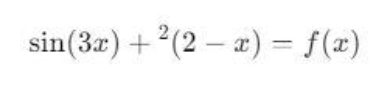

In [11]:
def f(x):
    return torch.sin(3*x) + (x-2)**2


x = torch.rand(1, requires_grad=True)
lr = 0.01
num_iterations = 100

for i in range(num_iterations):
    f_x = f(x)
    f_x.backward()

    with torch.no_grad():
        x -= lr * x.grad 

    x.grad.zero_()

f_x = f(x)

print(f"Minimum: x = {x.item()}, f(x) = {f_x.item()}")

Minimum: x = 1.649419903755188, f(x) = -0.8494048118591309


# Q3

As you know, decision boundaries in classification problems can take various forms. Especially in cases where the data are distributed nonlinearly, constructing an appropriate decision boundary can be challenging.
Your first task in this problem is to show that the dataset below cannot be perfectly classified using a single-layer neural network (perceptron).<br>
Next, show that you can perfectly classify this data by adding a second layer with non-linear activation functions.

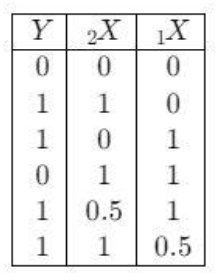

### part a

In [331]:
# [Y, X2, X1]
data = torch.tensor([
    [0, 0, 0],
    [1, 1, 0],
    [1, 0, 1],
    [0, 1, 1],
    [1, 0.5, 1],
    [1, 1, 0.5]
], dtype=torch.float32)

In [332]:
X = data[:, 1:]
X2 = X[:, 0].numpy()
X1 = X[:, 1].numpy()
y = data[:, 0].numpy()

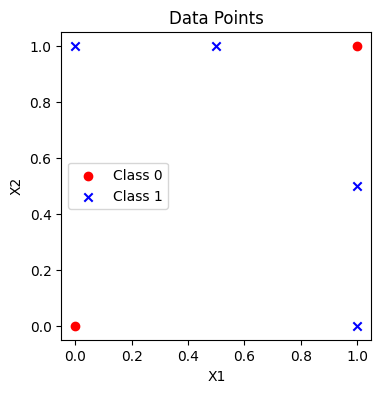

In [ ]:
plt.figure(figsize=(4, 4))

plt.scatter(X1[(y == 0)], X2[(y == 0)], color='red', marker='o', label='Class 0')
plt.scatter(X1[(y == 1)], X2[(y == 1)], color='blue', marker='x', label='Class 1')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data Points')
plt.legend()
plt.show()

As shown in the figure above, the data are distributed in such a way that a single line cannot separate the two classes. Therefore, given that a single-layer neural network can only create a linear boundary, it cannot fully separate these two classes.

### part b

In [321]:
y = data[:, 0].unsqueeze(1)
X = data[:, 1:]

In [ ]:
seed = 42
torch.manual_seed(seed)

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()

        self.fc1 = nn.Linear(input_size, 3)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(3, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

In [324]:
# Hyperparameters
input_size = 2
num_classes = 1
learning_rate = 0.03
num_epochs = 10000

# capture loss and acuuracy history
loss_history = []
accuracy_history = []

In [ ]:
model = MLP(input_size, num_classes)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):

    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record loss
    loss_history.append(loss.item())

    # Calculate accuracy
    with torch.no_grad():
        predicted = (outputs > 0.5).float()
        correct = (predicted == y).sum().item()
        accuracy = (correct / y.size(0)) * 100
        accuracy_history.append(accuracy)

    if (epoch + 1) % 1000 == 0 or epoch == 0:
        print(
            f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')

Epoch [1/10000], Loss: 0.6453, Accuracy: 66.67%


Epoch [1000/10000], Loss: 0.5426, Accuracy: 66.67%
Epoch [2000/10000], Loss: 0.3122, Accuracy: 100.00%
Epoch [3000/10000], Loss: 0.1201, Accuracy: 100.00%
Epoch [4000/10000], Loss: 0.0646, Accuracy: 100.00%
Epoch [5000/10000], Loss: 0.0412, Accuracy: 100.00%
Epoch [6000/10000], Loss: 0.0293, Accuracy: 100.00%
Epoch [7000/10000], Loss: 0.0223, Accuracy: 100.00%
Epoch [8000/10000], Loss: 0.0178, Accuracy: 100.00%
Epoch [9000/10000], Loss: 0.0148, Accuracy: 100.00%
Epoch [10000/10000], Loss: 0.0125, Accuracy: 100.00%


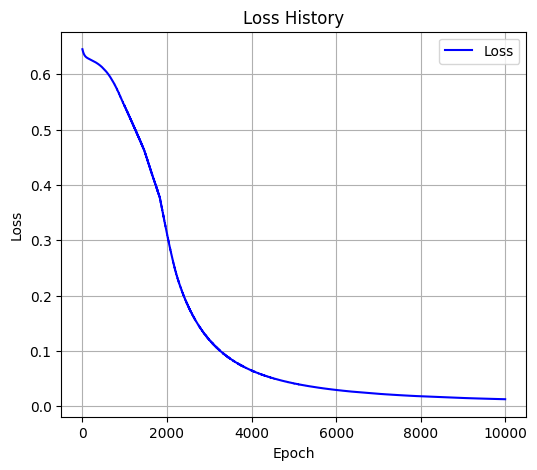

In [327]:
# Plot loss history
plt.figure(figsize=(6, 5))
plt.plot(loss_history, label='Loss', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()
plt.grid(True)
plt.show()

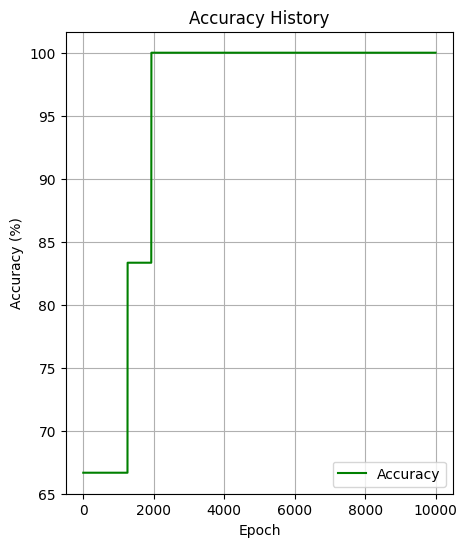

In [328]:
# Plotting accuracy history
plt.figure(figsize=(5, 6))
plt.plot(accuracy_history, label='Accuracy', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy History')
plt.legend()
plt.grid(True)
plt.show()